# **Heart Attack Prediction**


# Import Python Libraries

In [ ]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

# Reading the Income Classification Dataset

In [ ]:
df = pd.read_csv('/content/sample_data/brfss2020.csv',  on_bad_lines='skip')

In [ ]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020,1,4,2020,1100.0,2020000001,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020,2,7,2020,1200.0,2020000002,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,1232020,1,23,2020,1100.0,2020000003,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,1092020,1,9,2020,1100.0,2020000004,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,1042020,1,4,2020,1100.0,2020000005,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


# **Exploration (EDA) & Visualization**

In [ ]:
df.shape

(401958, 279)

In [ ]:
df.dtypes

_STATE      float64
FMONTH      float64
IDATE         int64
IMONTH        int64
IDAY          int64
             ...   
_STOLDNA    float64
_VIRCOLN    float64
_SBONTIM    float64
_CRCREC1    float64
_AIDTST4    float64
Length: 279, dtype: object

In [ ]:
df_features_selected = df[['SEXVAR', '_IMPRACE', '_AGE65YR', 'GENHLTH', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4']]
df_features_selected.head()

,SEXVAR,_IMPRACE,_AGE65YR,GENHLTH,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,DIABETE4,CVDSTRK3,CVDCRHD4,CVDINFR4
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,2.0,2.0,3.0,2.0,1.0,9.0,9.0,3.0,2.0,2.0,2.0
2,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0
3,2.0,1.0,2.0,1.0,9.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,2.0


In [ ]:
df_features_selected.dtypes

SEXVAR      float64
_IMPRACE    float64
_AGE65YR    float64
GENHLTH     float64
_RFBMI5     float64
_TOTINDA    float64
_SMOKER3    float64
DRNKANY5    float64
DIABETE4    float64
CVDSTRK3    float64
CVDCRHD4    float64
CVDINFR4    float64
dtype: object

In [ ]:
df_features_selected.isna().sum()

SEXVAR      0
_IMPRACE    0
_AGE65YR    0
GENHLTH     8
_RFBMI5     0
_TOTINDA    0
_SMOKER3    0
DRNKANY5    0
DIABETE4    6
CVDSTRK3    3
CVDCRHD4    3
CVDINFR4    6
dtype: int64

In [ ]:
categorical_variables = ['_AGE65YR', 'GENHLTH', 'CVDSTRK3']
numeric_variables = ['SEXVAR', '_IMPRACE', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDCRHD4']

In [ ]:
map = {
    'Obesity_Overweight' : '_RFBMI5',
    'Smoking' : '_SMOKER3',
    'Physical_Inactivity' : '_TOTINDA',
    'Gender' : 'SEXVAR',
    'Heredity' : '_IMPRACE',
    'Age' : '_AGE65YR',
    'Alcohol' : 'DRNKANY5',
    'Coronary_Heart_Disease' : 'CVDCRHD4',
    'Stroke' : 'CVDSTRK3',
    'Heart_Attack' : 'CVDINFR4'
    }


# Heart Attack

**1- yes**

**0 - No**

In [ ]:
df_features_selected['CVDINFR4'].value_counts()

2.0    377918
1.0     21957
7.0      1761
9.0       316
Name: CVDINFR4, dtype: int64


*   **imbalanced data**



In [ ]:
for k,v in map.items():
  df_features_selected = df_features_selected.rename(columns={v : k})

In [ ]:
df_features_selected.head()

,Gender,Heredity,Age,GENHLTH,Obesity_Overweight,Physical_Inactivity,Smoking,Alcohol,DIABETE4,Stroke,Coronary_Heart_Disease,Heart_Attack
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,2.0,2.0,3.0,2.0,1.0,9.0,9.0,3.0,2.0,2.0,2.0
2,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0
3,2.0,1.0,2.0,1.0,9.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,2.0


In [ ]:
df_features_selected = df_features_selected[(df_features_selected['Heart_Attack'] != 7) & (df_features_selected['Heart_Attack'] != 9)]
chg = {1 : 0, 2 : 1}
df_features_selected['Heart_Attack'].replace(to_replace=chg, inplace = True)

In [ ]:
df_features_selected.head()

,Gender,Heredity,Age,GENHLTH,Obesity_Overweight,Physical_Inactivity,Smoking,Alcohol,DIABETE4,Stroke,Coronary_Heart_Disease,Heart_Attack
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
1,2.0,2.0,2.0,3.0,2.0,1.0,9.0,9.0,3.0,2.0,2.0,1.0
2,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,3.0,2.0,2.0,1.0
3,2.0,1.0,2.0,1.0,9.0,2.0,4.0,2.0,3.0,2.0,2.0,1.0
4,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,1.0


Obesity_Overweight
Smoking
Physical_Inactivity
Gender
Heredity
Age
Alcohol
Coronary_Heart_Disease
Stroke
Heart_Attack


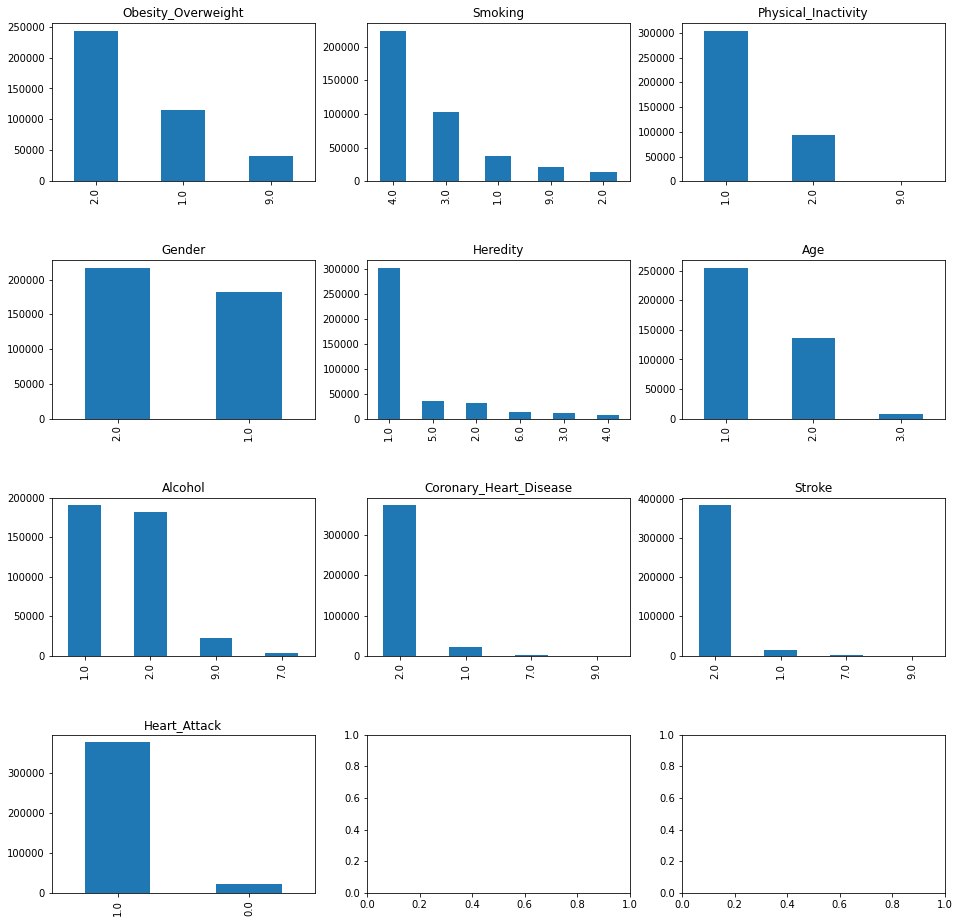

In [ ]:
df_hist = df_features_selected.dropna()
#generate a figures grid:
fig, axes = plt.subplots(4,3,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 3
max_bars = 8
i=0
for k,v in map.items():
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    print(k)
    #create the "value counts" for the first <max_bars> categories:
    u=min(df_hist[k].nunique(n),max_bars)
    vc = df_hist[k].value_counts()
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=k)
    i+=1

# Age

In [ ]:
df_features_selected['Age'].value_counts()

1.0    255119
2.0    136723
3.0      8039
Name: Age, dtype: int64

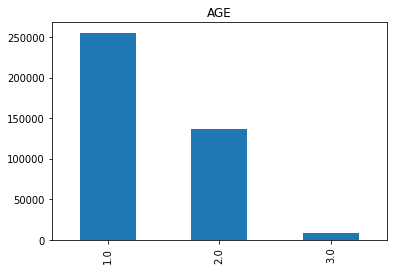

In [ ]:
max_bars = 4
u=min(df_features_selected['Age'].nunique(),max_bars)
vc = df_features_selected['Age'].value_counts()[:u]
    
    # plot a bar chart using Pandas
vc.plot(kind='bar',title='AGE')

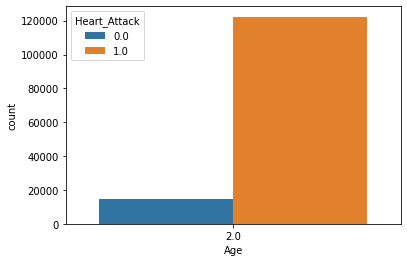

In [ ]:
sns.countplot(x='Age', hue='Heart_Attack', data=df_features_selected[df_features_selected['Age']==2])

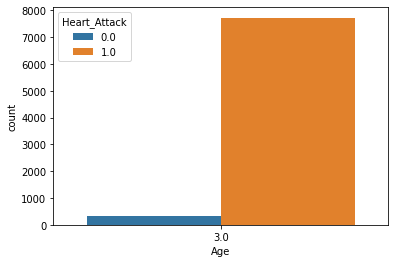

In [ ]:
sns.countplot(x='Age', hue='Heart_Attack', data=df_features_selected[df_features_selected['Age']==3])

# Gender

In [ ]:
#Respondent Sex -> Column 31
df.columns[31]

'SEXVAR'

In [ ]:
df['SEXVAR'].dtype

dtype('float64')

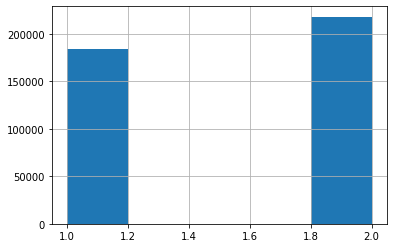

In [ ]:
df["SEXVAR"].hist(bins=5)

In [ ]:
#df['SEXVAR'].unique()
df["SEXVAR"].value_counts()

2.0    218016
1.0    183942
Name: SEXVAR, dtype: int64

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

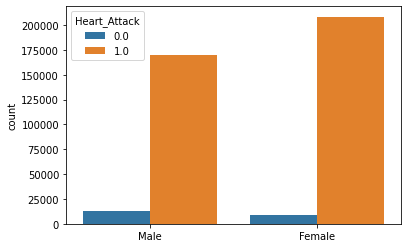

In [ ]:

ax=sns.countplot(data=df_features_selected, x='Gender', hue='Heart_Attack')
ax.set_xlabel('')
ax.set_xticklabels(['Male', 'Female'])



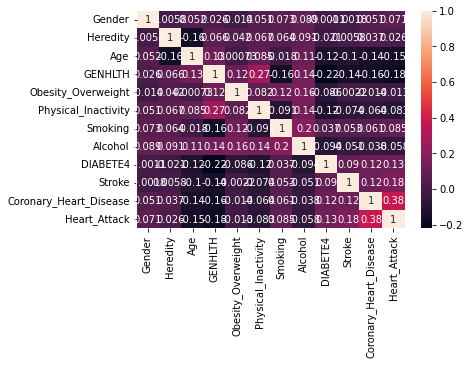

In [ ]:
sns.heatmap(df_features_selected.corr(method='spearman'),annot=True)